In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class MDP:
    def __init__(self, states, actions, transition_probabilities, rewards, discount_factor=0.9):
        self.states = states
        self.actions = actions
        self.transition_probabilities = transition_probabilities
        self.rewards = rewards
        self.discount_factor = discount_factor
        
    def policy_evaluation(self, policy, theta=1e-6):
        value_function = np.zeros(len(self.states))
        
        while True:
            delta = 0
            for s in range(len(self.states)):
                v = value_function[s]
                value_function[s] = sum(
                    policy[s][a] * sum(
                        self.transition_probabilities[s][a][s_prime] * 
                        (self.rewards[s][a][s_prime] + self.discount_factor * value_function[s_prime])
                        for s_prime in range(len(self.states))
                    )
                    for a in range(len(self.actions))
                )
                delta = max(delta, abs(v - value_function[s]))
            if delta < theta:
                break

        return value_function
        
    def policy_improvement(self, value_function):
        policy = np.zeros((len(self.states), len(self.actions)))

        for s in range(len(self.states)):
            action_values = np.zeros(len(self.actions))
            for a in range(len(self.actions)):
                action_values[a] = sum(
                    self.transition_probabilities[s][a][s_prime] *
                    (self.rewards[s][a][s_prime] + self.discount_factor * value_function[s_prime])
                    for s_prime in range(len(self.states))
                )
            best_action = np.argmax(action_values)
            policy[s][best_action] = 1.0  # Deterministic policy
            # Ensure other actions in the current state have probability 0
            policy[s] = np.zeros(len(self.actions))
            policy[s][best_action] = 1.0
        
        return policy

    def policy_iteration(self):
        # Arbitrarily initialize a policy
        policy = np.ones((len(self.states), len(self.actions))) / len(self.actions)

        while True:
            value_function = self.policy_evaluation(policy)
            new_policy = self.policy_improvement(value_function)
            if np.array_equal(new_policy, policy):
                break
            policy = new_policy

        return policy, value_function

In [8]:
def plot_value_function(value_function, states):
    plt.figure(figsize=(8, 4))
    plt.bar(states, value_function, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Value Function')
    plt.title('Value Function for Each State')
    plt.xticks(states)
    plt.grid()
    plt.show()

In [9]:
def plot_policy(policy, states):
    action_labels = ['Action 0', 'Action 1']
    num_states = len(states)

    plt.figure(figsize=(8, 4))
    
    # Create a horizontal bar plot for each state
    for i, state in enumerate(states):
        plt.barh(action_labels, policy[i], left=i, height=0.4, label=f'State {state}')
    
    plt.xlabel('Policy Probability')
    plt.title('Policy Distribution Across States')
    plt.xlim(0, 1)
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()


Optimal Policy:
[[0. 1.]
 [1. 0.]
 [1. 0.]]
Optimal Value Function:
[10.          0.90909039  0.        ]


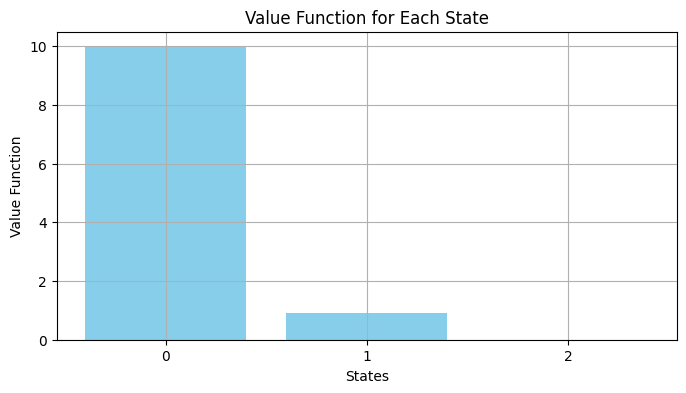

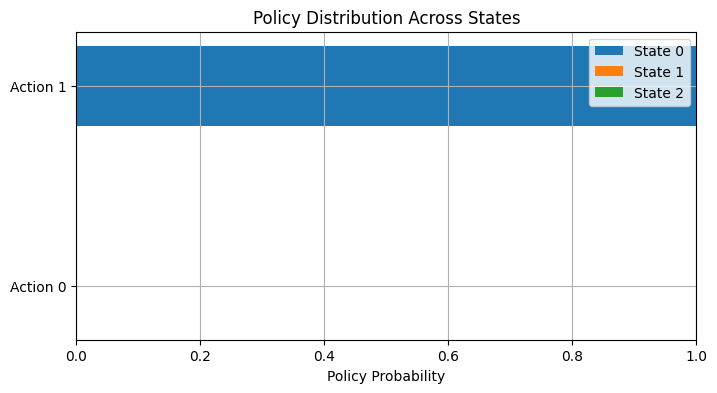

In [10]:
if __name__ == "__main__":
    # Define the states and actions
    states = [0, 1, 2]
    actions = [0, 1]  # e.g., 0: left, 1: right

    # Transition probabilities: P[state][action][next_state]
    transition_probabilities = [
        [[0.8, 0.2, 0.0],  # From state 0: action 0 leads to state 0 with prob 0.8, to state 1 with prob 0.2
         [0.0, 0.0, 1.0]], # From state 0: action 1 leads to state 2 with prob 1.0
        [[0.0, 0.5, 0.5],  # From state 1: action 0 leads to state 1 with prob 0.5, to state 2 with prob 0.5
         [0.0, 0.0, 1.0]], # From state 1: action 1 leads to state 2 with prob 1.0
        [[0.0, 0.0, 1.0],  # From state 2, this state is a terminal state, leads to itself
         [0.0, 0.0, 1.0]]   # Action disregarded in terminal state
    ]

    # Reward structure: R[state][action][next_state]
    rewards = [
        [[1, 0, 0], [0, 0, 10]],  # From state 0
        [[0, 0, 1], [0, 0, 0]],    # From state 1
        [[0, 0, 0], [0, 0, 0]]      # From state 2 (terminal state)
    ]

    # Create MDP instance
    mdp_instance = MDP(states, actions, transition_probabilities, rewards)
    
    # Perform Policy Iteration
    optimal_policy, optimal_value_function = mdp_instance.policy_iteration()

    print("Optimal Policy:")
    print(optimal_policy)
    print("Optimal Value Function:")
    print(optimal_value_function)

    # Visualizing the results
    plot_value_function(optimal_value_function, states)
    plot_policy(optimal_policy, states)

The results show that the agent (or decision-maker) should aim to reach State 0 as quickly as possible, because that's where it gets the most value (or reward). In State 0, following the best strategy, the agent earns a high reward (10 points), which is why the value for this state is so much higher than for the others.

When the agent is in State 1, things aren't as good, but it can still make decent progress by choosing the first action (Action 0), which moves it towards a better outcome. The value for State 1 is just under 1, so it’s not terrible, but it's clear that State 0 is the real prize.

If the agent ends up in State 2, though, it’s pretty much game over. The value here is 0, which means nothing good happens anymore—this is essentially a dead-end. So, in this setup, the best strategy is to avoid State 2 and prioritize actions that keep moving the agent toward State 0.

The plots also reinforce this strategy. The value function graph shows how much better State 0 is compared to the others, and the policy graph makes it clear: in State 0, the agent should take Action 1 to reach the best outcome, while in State 1 and State 2, Action 0 is the safer (or only) bet.